# Project 4: Deep Learning Pets

Use this notebook as the starting point for the Practice activities.

Student Name:    **[  Put your Name Here ]**


Videos:


*   [Basic Challenge Walkthrough](https://www.youtube.com/watch?v=JeF-OTbDcGg)
*   [Hints for improving your score](https://www.youtube.com/watch?v=fSROOv7S6Vo)





# Main Task

In this project you will try to complete the [PetFinder.my Adoption Prediction challenge on Kaggle](https://www.kaggle.com/c/petfinder-adoption-prediction).

This notebook sets up the basic data and a basic neural network. You must modify this notebook to improve its performance.

You should try a number of different attempts at this. At the end of the notebook you will writeup what you tried and how it worked.



# Section 0

=== *You must run this section to set up things for any of the sections below * ===
### Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
-  [scikit-learn](https://scikit-learn.org/stable/) : provides many machine learning algorithms and tools to training and test.




In [79]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# The Keras library provides support for neural networks and deep learning
print ("====== This should generate a FutureWaring on Conversion ===== ignore this warning")
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils, to_categorical

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

====== This should generate a FutureWaring on Conversion ===== ignore this warning


## Task 1: PetFinder Kaggle Challenge

Sign up for the [PetFinder.my Adoption Prediction challenge on Kaggle](https://www.kaggle.com/c/petfinder-adoption-prediction).

Here is a summary of the data

### Pet Data Fields
- PetID - Unique hash ID of pet profile
- AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
- Type - Type of animal (1 = Dog, 2 = Cat)
- Name - Name of pet (Empty if not named)
- Age - Age of pet when listed, in months
- Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
- Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
- Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
- Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
- MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- Quantity - Number of pets represented in profile
- Fee - Adoption fee (0 = Free)
- State - State location in Malaysia (Refer to StateLabels dictionary)
- RescuerID - Unique hash ID of rescuer
- VideoAmt - Total uploaded videos for this pet
- PhotoAmt - Total uploaded photos for this pet
- Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.
### AdoptionSpeed
Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way: 
- 0 - Pet was adopted on the same day as it was listed. 
- 1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
- 2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
- 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 
- 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

### File descriptions
- train.csv - Tabular/text data for the training set
- train.csv - Tabular/text data for the training set
- test.csv - Tabular/text data for the test set
- sample_submission.csv - A sample submission file in the correct format
- breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
- color_labels.csv - Contains ColorName for each ColorID
- state_labels.csv - Contains StateName for each StateID

# Section 1:  Set up Pet Data



### Set up the Input and output

- Training data: Information on 14,993 pets up for adoption
- Submission data: Information on 3,948 pets where we need to predict adoption time

### NOTE: This dataset is somewhat large and loading it may take a minute or two 


In [107]:
# Read data from the actual Kaggle download files stored in a raw file in GitHub
github_folder = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/petfinder-adoption/'
kaggle_folder = '../input/'

data_folder = github_folder
# Uncomment the next line to switch from using the github files to the kaggle files for a submission
#data_folder = kaggle_folder

train = pd.read_csv(data_folder + 'train/train.csv')
submit = pd.read_csv(data_folder + 'test/test.csv')

sample_submission = pd.read_csv(data_folder + 'test/sample_submission.csv')
labels_breed = pd.read_csv(data_folder + 'breed_labels.csv')
labels_color = pd.read_csv(data_folder + 'color_labels.csv')
labels_state = pd.read_csv(data_folder + 'state_labels.csv')

print ("training data shape: " ,train.shape)
print ("submission data shape: : " ,submit.shape)

training data shape:  (14993, 24)
submission data shape: :  (3948, 23)


In [108]:
train.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


## Task 2: Select features

Select which pet features to include in the training data. You should also select the same features for the submission.

Note, some features you may want to modify and you can add them in future cells.

In [113]:
# Select which features to use
pet_train = train[['Age','Gender','Health','MaturitySize']]
# Everything we do to the training data we also should do the the submission data
pet_submit = submit[['Age','Gender','Health','MaturitySize']]

# Convert output to one-hot encoding
pet_adopt_speed = to_categorical( train['AdoptionSpeed'] )

print ("pet_train data shape: " ,pet_train.shape)
print ("pet_submit data shape: " ,pet_submit.shape)
print ("pet_adopt_speed data shape: " ,pet_adopt_speed.shape)


pet_train data shape:  (14993, 4)
pet_submit data shape:  (3948, 4)
pet_adopt_speed data shape:  (14993, 5)


## Task 3: Modify some features

Some features may need to be modified. For example, Vaccinated has values of  (1 = Yes, 2 = No, 3 = Not Sure) but this will confuse a neural network because these numbers are not relative to each other. So, Yes + 1 = No and No + 1 = Not Sure.

Instead we will set No and Not Sure to 0 and Yes to 1.

The following code defines a function to do this and then the map method applies this function to each pet's Vaccinated feature.

Again, everything we do to the training data, we also need to do to the submission data.

In [114]:
# Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
#encodedVaccinated = train[['Vaccinated']] 
def fixVac( value ):
    if value > 1: return 0
    else: return value

#train['encodedVaccinated'] = list(map(lambda a: 0 if (a>1) else a,train['Vaccinated']))
pet_train['encodedVaccinated'] = list(map(fixVac,train['Vaccinated']))
# Do the same thing to the submission data
pet_submit['encodedVaccinated'] = list(map(fixVac,submit['Vaccinated']))

pet_train.head(10)

,Age,Gender,Health,MaturitySize,encodedVaccinated
0,3,1,1,1,0
1,1,1,1,2,0
2,1,1,1,2,1
3,4,2,1,2,1
4,1,1,1,2,0
5,3,2,1,2,0
6,12,1,1,2,0
7,0,2,1,2,0
8,2,2,1,2,0
9,12,2,1,2,0


## Task 4: Encode some features

Some numeric features like color and breed are called categorical features. Even though they may be enoced as a number, the numbers do not relate numerically to each other. So if one dog has color 2 and  dog two has color 4, this does not mean dog two is twice as colorful as dog one. It only means that they have different colors. One might be light brown and the other gray.

For neural networks it works better when encode categorical data as one-hot encoding. See [An Overview of Categorical Input Handling for Neural Networks](https://towardsdatascience.com/an-overview-of-categorical-input-handling-for-neural-networks-c172ba552dee) for more details.

Since this is a common need, the pandas library has a built in method, [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), for generating dummy variables based a categorical variable. For additional information on this, see 
[The Dummy’s Guide to Creating Dummy Variables](https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40)



In [115]:
# Use get_dummies to create dummy variables of the Color1 feature
encodedColor1 = pd.get_dummies( train['Color1'], prefix="color" )

# Add the new dummy variables to the pet_train data frame
pet_train = pd.concat([pet_train, encodedColor1], axis='columns')
# Do the same thing to the submission data
encodedColor2 = pd.get_dummies( submit['Color1'], prefix="color" )
pet_submit = pd.concat([pet_submit, encodedColor2], axis='columns')

# print out the current data
print ("Size of pet_train = ", pet_train.shape)
print ("Size of pet_submit = ", pet_submit.shape)
pet_train.head(5)


Size of pet_train =  (14993, 12)
Size of pet_submit =  (3948, 12)


,Age,Gender,Health,MaturitySize,encodedVaccinated,color_1,color_2,color_3,color_4,color_5,color_6,color_7
0,3,1,1,1,0,1,0,0,0,0,0,0
1,1,1,1,2,0,1,0,0,0,0,0,0
2,1,1,1,2,1,0,1,0,0,0,0,0
3,4,2,1,2,1,1,0,0,0,0,0,0
4,1,1,1,2,0,1,0,0,0,0,0,0


### Encode multiple features

If you have multiple features you can use the following code to convert a list of features into one-hot encoded dummy features


In [116]:
cat_columns = ['Breed1','Breed2','FurLength','Dewormed']

# Create the dummy variables for the columns listed above
dfTemp = pd.get_dummies( train[cat_columns], columns=cat_columns )
pet_train = pd.concat([pet_train, dfTemp], axis='columns')

# Do the same to the submission data
dfSummit = pd.get_dummies( submit[cat_columns], columns=cat_columns )
pet_submit = pd.concat([pet_submit, dfSummit], axis='columns')
# Get missing columns in the submission data
missing_cols = set( pet_train.columns ) - set( pet_submit.columns )
# Add a missing column to the submission set with default value equal to 0
for c in missing_cols:
    pet_submit[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
pet_submit = pet_submit[pet_train.columns]




# print out the current data
print ("Size of pet_train = ", pet_train.shape)
print ("Size of pet_submit = ", pet_submit.shape)
pet_train.head(5)

Size of pet_train =  (14993, 329)
Size of pet_submit =  (3948, 329)


,Age,Gender,Health,MaturitySize,encodedVaccinated,color_1,color_2,color_3,color_4,color_5,...,Breed2_304,Breed2_305,Breed2_306,Breed2_307,FurLength_1,FurLength_2,FurLength_3,Dewormed_1,Dewormed_2,Dewormed_3
0,3,1,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,1,1,2,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,2,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,4,2,1,2,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,1,1,2,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [117]:
print ("pet_train data shape: " ,pet_train.shape)
print ("pet_adopt_speed data shape: " ,pet_adopt_speed.shape)
print ("pet_submit data shape: " ,pet_submit.shape)


pet_train data shape:  (14993, 329)
pet_adopt_speed data shape:  (14993, 5)
pet_submit data shape:  (3948, 329)



### Scale and Split the data

**Scale Data:** Neural Networks work best with the inputs are between 0 and +1, but the grayscale images have pixel values between 0 and 255. So, each pixel value is divided by 255 to scale it.

**Submission: ** We do the same thing for the submission data

**Split the Data:** The training data is split with 90% used for training and 10% used for testing.

In [118]:
# Scale the data to put large features like area_mean on the same footing as small features like smoothness_mean
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
pet_train_scaled = scaler.fit_transform(pet_train)
pet_submit_scaled = scaler.fit_transform(pet_submit)

pet_train_scaled

array([[-0.41046553, -1.13878681, -0.18351784, ..., -1.12829263,
         1.45389512, -0.3671535 ],
       [-0.5206269 , -1.13878681, -0.18351784, ..., -1.12829263,
        -0.68780752,  2.72365643],
       [-0.5206269 , -1.13878681, -0.18351784, ...,  0.88629489,
        -0.68780752, -0.3671535 ],
       ...,
       [-0.46554622,  1.79561735, -0.18351784, ...,  0.88629489,
        -0.68780752, -0.3671535 ],
       [-0.07998143,  0.32841527, -0.18351784, ...,  0.88629489,
        -0.68780752, -0.3671535 ],
       [-0.5206269 , -1.13878681, -0.18351784, ..., -1.12829263,
         1.45389512, -0.3671535 ]])

In [119]:
# Split the data into 80% for training and 10% for testing out the models
X_train, X_test, y_train, y_test = train_test_split(pet_train_scaled, pet_adopt_speed, test_size=0.1)

print ("X_train training data shape of 28x28 pixels greyscale: " ,X_train.shape)
print ("X_test submission data shape of 28x28 pixels greyscale: : " ,X_test.shape)

print ("y_train training data shape of 28x28 pixels greyscale: " ,y_train.shape)
print ("y_test submission data shape of 28x28 pixels greyscale: : " ,y_test.shape)

X_train training data shape of 28x28 pixels greyscale:  (13493, 329)
X_test submission data shape of 28x28 pixels greyscale: :  (1500, 329)
y_train training data shape of 28x28 pixels greyscale:  (13493, 5)
y_test submission data shape of 28x28 pixels greyscale: :  (1500, 5)


### Neural Network

Set up the layers of the Neural Network

One possibly configuration would be:

```
NN = Sequential()
NN.add(Dense(20, activation='relu', input_dim=(input_Size)))
NN.add(Dense(10, activation='relu'))
NN.add(Dropout(0.3))
NN.add(Dense(10, activation='relu'))
NN.add(Dense(output_Size, activation='softmax'))
```

Though you should try your own configuration. We will eventually look at networks of 50+ layers, but for now I suggest you limit yourself to 3-5 hidden layers. 


*Note: You should not change the input or output layers, they are fixed by our problem definition*

In [0]:
# Set up the Neural Network
input_Size = X_test.shape[1]     # This is the number of features you selected for each pet
output_Size = y_train.shape[1]   # This is the number of categories for adoption speed, should be 5

NN = Sequential()
NN.add(Dense(20, activation='relu', input_dim=(input_Size)))
#NN.add(Dropout(0.3))
NN.add(Dense(10, activation='relu'))
NN.add(Dense(output_Size, activation='softmax'))

# Compile neural network model
NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Callbacks

-  [ReduceLROnPlateau](https://keras.io/callbacks/#reducelronplateau). 

-  [EarlyStopping callback](https://keras.io/callbacks/#earlystopping) 

-  [ModelCheckpoint callback](https://keras.io/callbacks/#modelcheckpoint) 

In [0]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=2, 
                                            factor=0.5,                                            
                                            min_lr=0.000001)

early_stops = EarlyStopping(monitor='val_loss', 
                            min_delta=0, 
                            patience=20, 
                            verbose=2, 
                            mode='auto')

checkpointer = ModelCheckpoint(filepath = 'cis3115_MNIST.{epoch:02d}-{accuracy:.6f}.hdf5',
                               verbose=2,
                               save_best_only=True, 
                               save_weights_only = True)


### Train the Neural Network

This is why we are only using 10 epochs initially, but you should consider running more epochs

In [122]:
# Fit model on training data for network with dense input layer

history = NN.fit(X_train, y_train,
          epochs=10,
          verbose=1,
          callbacks=[learning_rate_reduction, early_stops],
          validation_data=(X_test, y_test))


Train on 13493 samples, validate on 1500 samples
Epoch 1/10
13493/13493 [==============================] - 1s 85us/step - loss: 1.6227 - acc: 0.2835 - val_loss: 1.4780 - val_acc: 0.3313
Epoch 2/10
13493/13493 [==============================] - 1s 50us/step - loss: 1.4403 - acc: 0.3393 - val_loss: 1.4426 - val_acc: 0.3407
Epoch 3/10
13493/13493 [==============================] - 1s 50us/step - loss: 1.4004 - acc: 0.3578 - val_loss: 1.4260 - val_acc: 0.3560
Epoch 4/10
13493/13493 [==============================] - 1s 49us/step - loss: 1.3797 - acc: 0.3717 - val_loss: 1.4267 - val_acc: 0.3700
Epoch 5/10
13493/13493 [==============================] - 1s 49us/step - loss: 1.3668 - acc: 0.3788 - val_loss: 1.4282 - val_acc: 0.3707
Epoch 6/10
13493/13493 [==============================] - 1s 49us/step - loss: 1.3572 - acc: 0.3893 - val_loss: 1.4273 - val_acc: 0.3733
Epoch 7/10
13493/13493 [==============================] - 1s 49us/step - loss: 1.3488 - acc: 0.3938 - val_loss: 1.4377 - val_acc:

In [123]:
# 10. Evaluate model on test data
print ("Running final scoring on test data")
score = NN.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
1500/1500 [==============================] - 0s 28us/step
The accuracy for this model is  0.37


## Plot the Training History

We store the performance during training is a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions, hopefully this is increasing to near 1.0
- Loss: How close the output is to the desired output, this should decrease to near 0.0

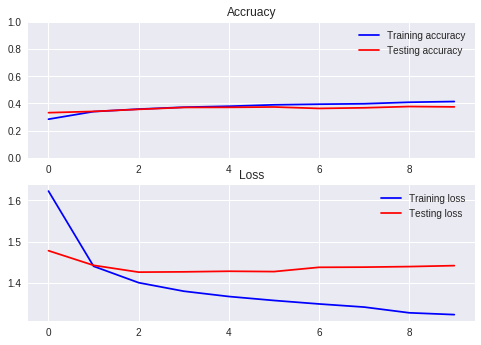

In [124]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['acc'], color='b', label="Training accuracy")
ax[0].plot(history.history['val_acc'], color='r',label="Testing accuracy")
ax[0].set_title("Accruacy")
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_ylim([0, 1])
              
ax[1].plot(history.history['loss'], color='b', label="Training loss")
ax[1].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[1])
ax[1].set_title("Loss")
legend = ax[1].legend(loc='best', shadow=True)


# Section 2: Create the Submission for Kaggle

The following code generates a file named submission.csv for the [PetFinder.my Adoption Prediction challenge on Kaggle](https://www.kaggle.com/c/petfinder-adoption-prediction).

Once you have this notebook working, you must load it up as a kernel in the Kaggle challenge.







In [125]:
print ("pet_train data shape: " ,pet_train.shape)
print ("submit data shape: " ,submit.shape)
print ("pet_submit data shape: " ,pet_submit_scaled.shape)


pet_train data shape:  (14993, 329)
submit data shape:  (3948, 23)
pet_submit data shape:  (3948, 329)


In [126]:
predictions = NN.predict_classes(pet_submit_scaled, verbose=1)

submissions=pd.DataFrame({'PetID': submit.PetID})
submissions['AdoptionSpeed'] = predictions

submissions.to_csv("submission.csv", index=False, header=True)

submissions.head(10)

3948/3948 [==============================] - 0s 57us/step


,PetID,AdoptionSpeed
0,378fcc4fc,2
1,73c10e136,4
2,72000c4c5,4
3,e147a4b9f,4
4,43fbba852,4
5,77a490ec9,1
6,28c4b1b13,4
7,d1eada628,4
8,d134dec34,4
9,bcd464bb8,3


## Task 5: Submit to Kaggle

Upload this notebook to Kaggle and submit the results.




# Writeup

Describe your different attempts to improve this notebook. What pet features did you try and how did you modify them? What neural networks did you try?

How did these different attempts perform with the test data? How did they perform as a Kaggle submission?


  - - - - Insert your writeup here - - - - 
 

# Wrapping Up

Remember to **share this sheet with your instructo**r and submit a link to it in Blackboard.